<a href="https://colab.research.google.com/github/sajiaakhter/mec-mini-projects/blob/master/mec_12_4_2_logistic_regression_mini_projec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [35]:
filepath_project = "https://github.com/springboard-curriculum/mec-mini-projects/blob/bfa33829077314a600472c0c2be850c6e07d960b/mec-12.4.2-logistic-regression-mini-project/data/01_heights_weights_genders.csv.zip"
filepath_drive = "https://drive.google.com/drive/folders/10Dm0Eectdd2_QXffvuP8BEPDqNefoFEy?usp=sharing/01_heights_weights_genders.csv"

filepath= "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
dflog = pd.read_csv(filepath)
dflog.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


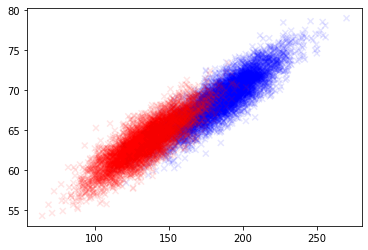

In [49]:
#Exercise: Create a scatter plot of Weight vs. Height
#Exercise: Color the points differently by Gender

from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.scatter(dflog.Weight, dflog.Height, c=[cm_bright.colors[i] for i in dflog.Gender=="Male"], marker = 'x',alpha = .1)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Height','Weight']].values, 
                                              (dflog.Gender == "Male").values,random_state=5)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.9252


In [56]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average


clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)


0.9172


Checkup Exercise Set II
Exercise: Implement the following search procedure to find a good model
You are given a list of possible values of `C` below
For each C:
Create a logistic regression model with that value of C
Find the average score for this model using the `cv_score` function **only on the training set** `(Xlr, ylr)`
Pick the C with the highest average score
Your goal is to find the best model parameters based *only* on the training set, without showing the model test set at all (which is why the test set is also called a *hold-out* set).


In [62]:
Cs = [0.001, 0.1, 1, 10, 100]
best_C = 0
max_score = 0
for i in Cs:
  clf = LogisticRegression(C=i)
  score = cv_score(clf, Xlr, ylr)
  #print(score,i)
  if score > max_score:
            max_score = score
            best_C = i
print(max_score,best_C)



0.9172 0.1


Checkup Exercise Set III

**Exercise:** Now you want to estimate how this model will predict on unseen data in the following way:

Use the C you obtained from the procedure earlier and train a 
Logistic Regression on the training data

Calculate the accuracy on the test data

You may notice that this particular value of `C` may or may not do as well as simply running the default model on a random train-test split.

Do you think that's a problem?
Why do we need to do this whole cross-validation and **grid search** stuff anyway?

In [64]:
clf = LogisticRegression(C=best_C)
score = cv_score(clf, Xlr, ylr)
print(score)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.9172
0.9248


Accuracy score is not better than the basic logistic regration. 

**Checkup Exercise Set IV**

Exercise: Use scikit-learn's [GridSearchCV] tool to perform cross validation and grid search. 

Does it give you the same best value of `C`? 
How does this model you've obtained perform on the test set?


In [76]:
from sklearn.model_selection import GridSearchCV

clfl2 = LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfl2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xlr, ylr)
print(fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_)

clfl2=LogisticRegression(C=fitmodel.best_params_['C'])
clfl2.fit(Xlr, ylr)
ypred2=clfl2.predict(Xtestlr)
print(accuracy_score(ypred2, ytestlr))


LogisticRegression(C=1) {'C': 1} 0.9168
0.9252


No, the C value is different. It works better on test set based on accuracy score. 